In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [4]:
# Create the job
# Create the job
savedir = '/mnt/md0/runs'
exp_str = 'AH010_2024-01-17_1'
job = Job(savedir,exp_str, create=False,  overwrite=False, verbosity = 10)
subjects_dir =   '/mnt/zaru-subjects/'
expt_info = {
    'subject':         'AH010',
    'date' :          '2024-01-17',
    'expnum' :         [1],}
all_tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info)
job.params['date'] = '2024-01-17'
job.params['expnum'] = [1]
#SEEMS that some job.params are None
# exp_dir = flu.find_expt_file((job.params['subject'], job.params['date'], job.params['expnum'][0]),
#                          'root', dirs=[job.params['subjects_dir']])
#offset_files = job.get_registered_files('registered_data', 'offset')
cz = (0,15)
ct = (None, None)
cy = (None,None)
cx = (None,None)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/md0/runs/s3d-AH010_2024-01-17_1/dirs.npy'

In [144]:
from suite3d import iter_step

In [145]:
params = job.params.copy()

In [189]:
params['npil_filt_type'] = 'unif'
params['conv_filt_type'] = 'gaussian'
params['conv_filt_xy'] = 2.5
params['npil_filt_xy'] = 5
params['intensity_thresh'] = 0

In [147]:
mov_zerod = mov.copy()
mov_zerod[:,:,:100] = 0
mov_zerod[:,:,:,:100] = 0
mov_zerod[:,:,-100:] = 0
mov_zerod[:,:,:,-100:] = 0

In [162]:
nz, nt, ny, nx = mov.shape

In [173]:
dx = 3; dy = 4
mov_staggered = mov.copy()
for i in range(nz):
    mov_staggered[i,:,:100+dy*i] = 0
    mov_staggered[i,:,-(100-dy*i):] = 0
    mov_staggered[i,:,:, :100+dx*i] = 0
    mov_staggered[i,:,:, -(100-dx*i):] = 0

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2fa81610>)

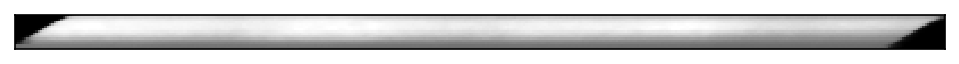

In [175]:
tfu.show_tif(mov.mean(axis=(1,2)))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2fb30370>)

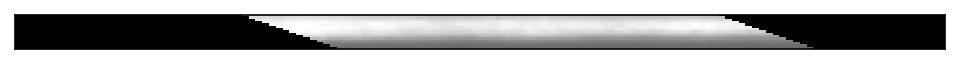

In [174]:
tfu.show_tif(mov_staggered.mean(axis=(1,2)))

In [181]:
(sdnorm_stag, mov_filt_stag, mov_sub_stag), vmap_stag = iter_step.calculate_corrmap(mov_staggered, params, 
                                                                                        job.dirs, save=False, return_mov_filt=True, iter_limit = 1)

Using conv_filt: gaussian, 1.00, 2.50
Using np_filt: unif, 1.00, 5.00
Running only 1 iters
Running batch 1 of 1
Will process 300 frames (0-300, t_batch_size: 300)
Loaded and swapped, idx 0 to 300
Calculating corr map
Rolling mean filter
Stdev over time
Sharr creation
Sub and conv
Vmap
Calculated corr map in 12.23 seconds


In [176]:
(sdnorm_zerod, mov_filt_zerod, mov_sub_zerod), vmap_zerod = iter_step.calculate_corrmap(mov_zerod, params, 
                                                                                        job.dirs, save=False, return_mov_filt=True, iter_limit = 1)

Using conv_filt: gaussian, 1.00, 2.50
Using np_filt: unif, 1.00, 5.00
Running only 1 iters
Running batch 1 of 1
Will process 300 frames (0-300, t_batch_size: 300)
Loaded and swapped, idx 0 to 300
Calculating corr map
Rolling mean filter
Stdev over time
Sharr creation
Sub and conv
Vmap
Calculated corr map in 14.09 seconds


In [177]:
(sdnorm, mov_filt, mov_sub), vmap = iter_step.calculate_corrmap(mov, params, job.dirs, save=False, return_mov_filt=True, iter_limit = 1)

Using conv_filt: gaussian, 1.00, 2.50
Using np_filt: unif, 1.00, 5.00
Running only 1 iters
Running batch 1 of 1
Will process 300 frames (0-300, t_batch_size: 300)
Loaded and swapped, idx 0 to 300
Calculating corr map
Rolling mean filter
Stdev over time
Sharr creation
Sub and conv
Vmap
Calculated corr map in 13.75 seconds


(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2cf08ac0>)

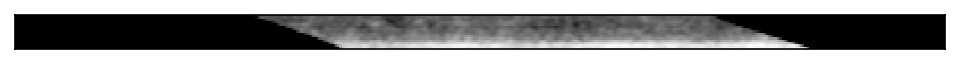

In [185]:
tfu.show_tif(vmap_stag.mean(axis=1), vminmax_percentile=(50,100))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2ceca310>)

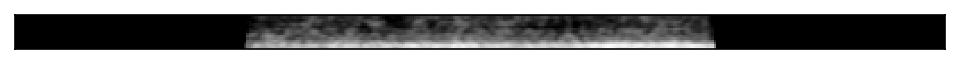

In [186]:
tfu.show_tif(vmap_zerod.mean(axis=1), vminmax_percentile=(50,100))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2ce8e130>)

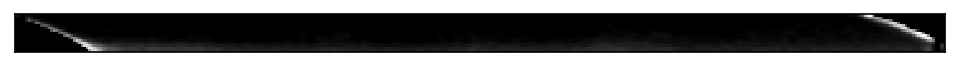

In [187]:
tfu.show_tif(vmap.mean(axis=2), vminmax_percentile=(50,100))

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f9d2cd9c100>)

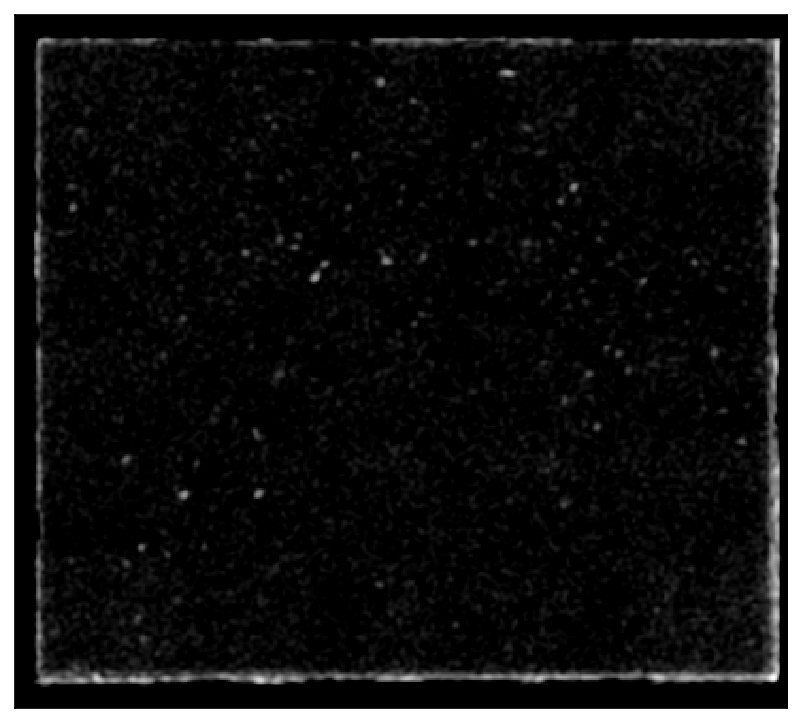

In [190]:
tfu.show_tif(vmap[5], vminmax_percentile=(50,100))